# ECMWF ERA5 download

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
import xarray as xr
from src.data_loading.ecmwf import FileNames
from src.plot_utils import ps_defaults
ps_defaults()

In [3]:
skt = FileNames(variable="skin_temperature")
skt.archive_combined_path

'/gws/nopw/j04/ai4er/users/sdat2/ecmwf/skin_temperature_era5.nc'

In [ ]:
ds = xr.open_dataset(ARCHIVE_DIREC / "skin_temperature.nc")

In [8]:
ds = xr.open_dataset(ARCHIVE_DIREC / "total_precipitation.nc")

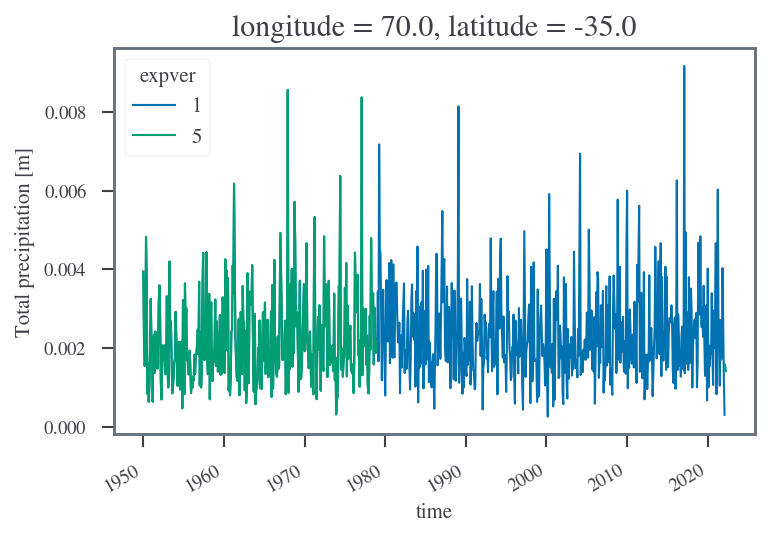

In [11]:
ds.isel(longitude=1000, latitude=500).tp.plot.line(hue="expver")

In [14]:
ds.isel(longitude=1000, latitude=500, time=slice(0,100),expver=1).drop("expver")

<xarray.Dataset>
Dimensions:    (time: 100)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 1958-04-01
    longitude  float32 70.0
    latitude   float32 -35.0
Data variables:
    tp         (time) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-05-11 22:02:59 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

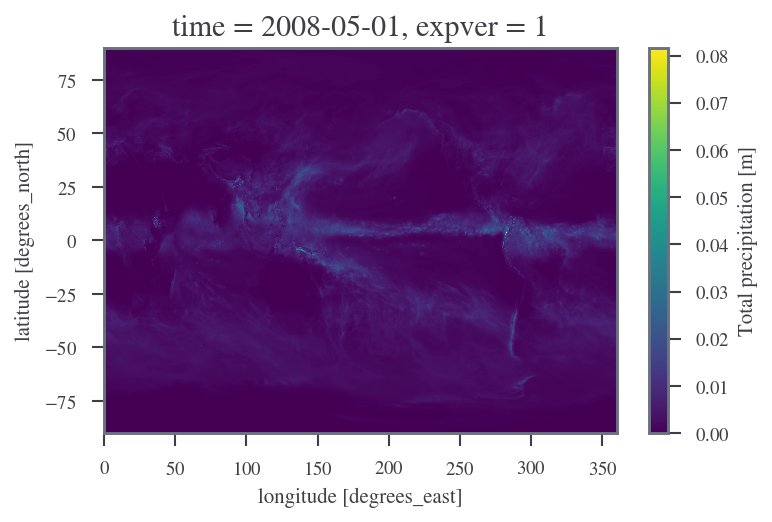

In [7]:
xr.open_dataset(DATA_DIREC / "total_precipitation.nc").isel(time=700, expver=0).tp.plot()